# Monte Carlo Methods

This exercise address the use of “random” numbers in Monte Carlo techniques. These are often the fastest or most straightforward way of tackling complicated problems in computational analysis.

You should use the random number routines included in numpy.random :
https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html

This library uses the "Mersenne Twister" algorithm internally, which is a modern, well behaved, pseudo-random number generator. Note that, by default, the generator will be initialised with a "seed" based on the time when the programme is started - giving a different sequence of numbers every time you run the programme. You may find it useful, while debuggging, to manually set a fixed "seed" at the start of the programme.  This will result in an identical sequence of random numbers, every time you run the programme.

## Q1 - Generating Distributions

In practise we usually want to generate floating point numbers with a particular distribution. Numpy.random includes several built-in distributions, however we often need to write our own. Two methods for achieving this were discussed in Lecture 3 :
1) an analytical function derived from the cumulative distribution function of the desired distribution.
2) the accept/reject method

### 1a)
Write code to generate random angles $\theta$, between 0 and $\pi$, with a probability distribution proportional to ${\rm sin}(\theta)$. You should write one routine based on the analytical method 1), and another using the accept/reject method. Both routines should use _numpy.random.random()_ to generate floating point numbers with a distribution between 0 and 1, and convert this to the desired ${\rm sin}(\theta)$ distribution.

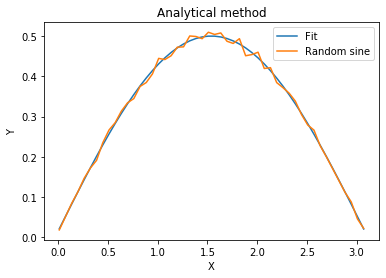

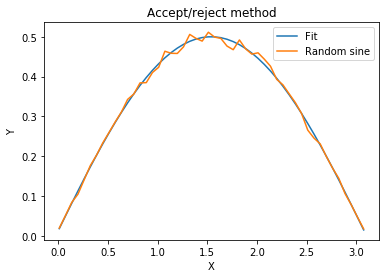

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import time
from mpl_toolkits.mplot3d import Axes3D
import statistics as st
import scipy
from scipy.optimize import curve_fit

detector1 = 0.55
detector2 = 0.6
detector3 = 0.85
detector4 = 0.5


def sinAnal():
    
    """
    This function uses the analytical method to generate a random number
    between 0 and pi with a distribution proportional to sin(x).
    """
    
    randNum = np.random.random()
    sinNum = np.arccos(1 - 2*randNum)                                           # Found by integrating sin(x) and finding the inverse (including normalisation).
    
    return sinNum


def sinAR():
    
    """
    This function uses the accept/reject method to generate a random number
    between 0 and pi with a distribution proportional to sin(x).
    """
    
    randNum = np.random.random()
    randPi = np.pi * np.random.random()
    
    if randNum < np.sin(randPi):
        return randPi
    else:
        return sinAR()                                                          # Carry out the function again if the number doesn't fit the distribution.


def sinDistAnal(numVal):
    
    """
    This function iterates the analytical random number function to fill
    a list with valid random numbers that can then be plotted.
    """

    sinListAnal = []
    
    for i in range(int(numVal)):
        sinListAnal.append(sinAnal())
    
    return sinListAnal
    

def sinDistAR(numVal):
    
    """
    This function iterates the accept/reject random number function to fill
    a list with valid random numbers that can then be plotted.
    """
    
    sinListAR = []
    
    for i in range(int(numVal)):
        sinListAR.append(sinAR())
    
    return sinListAR


def histPlot(numVal):
    
    """
    This function plots the sine distributions for both the analytical and 
    accept/reject methods as histograms.
    """
    
    sinListAnal = sinDistAnal(numVal)
    sinListAR = sinDistAR(numVal)
    
    return sinListAnal,sinListAR

    
def sinTrue(x,a,b,c,d):
    
    """
    This function takes 5 arguments and returns a sine that varies as a
    function of the values of the arguments. This is for plotting the
    fit of the randomly generated sine curve.
    """
    
    return a + b*np.sin(c*x+d)


def curveFit():
    
    """
    This function generates the x and y values of the randomly generated
    sine curve for both the analytical and accept/reject methods and
    plots them, as well as plotting a fit for the curve.
    """
    
    yvals1,xvals1 = np.histogram(histPlot(numVal)[0],50,density=True)
    xvals1 = xvals1[:-1]
    popt, pcov = curve_fit(sinTrue,xvals1,yvals1)                               # Calculating the fit of the sine curve.
    plt.plot(xvals1,sinTrue(xvals1,*popt),label="Fit")
    plt.plot(xvals1,yvals1,label="Random sine")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Analytical method")
    plt.legend()
    plt.show()
    
    yvals2,xvals2 = np.histogram(histPlot(numVal)[1],50,density=True)
    xvals2 = xvals2[:-1]
    popt, pcov = curve_fit(sinTrue,xvals2,yvals2)                                              
    plt.plot(xvals2,sinTrue(xvals2,*popt),label="Fit")
    plt.plot(xvals2,yvals2,label="Random sine")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Accept/reject method")
    plt.legend()
    plt.show()

numVal = 100000      

curveFit()


## Code Structure

The code in this section relied on the use of multiple user-defined functions, due to the many random elements and 'moving parts' of the exercise. 

#### Analytical Method

Firstly, there was a function for calculating a random number using the analytical method. This involved transforming random numbers with a uniform distribution between 0 and 1 to a sinusoidal distribution between 0 and $\pi$. This was done by manipulating the cumulative distribution functions:

$$\int_{x_0'}^{x_{req}'}P'(x')dx' = \int_{x_0}^{x_{gen}}P(x)dx,$$

where $x_0$ and $x_{gen}$ are the upper and lower limits of the uniform distribution, $x_0'$ and $x_{req}'$ are the upper and lower limits of the required distribution, $P(x)$ is the uniform distribution (a constant), and $P'(x')$ is the required distribution (sine).

Defining 

$$Q(x_{req}') = \int_{x_0'}^{x_{req}'}P'(x')dx',$$

integrating the function, and finding the inverse, the function that has to be implemented can be found. In this case, it was $\arccos(1-2x)$, where x is the uniformly distributed random number.

#### Accept/reject Method

Next, it was necessary to generate random numbers following a sine distribution using the accept/reject method. This is more simple to implement: generate a uniform random number between 0 and 1. If it's less than the sine of that number multiplied by $\pi$, add it to the distribution. If not, repeat until it is. 

#### Generating Lists

Now all that was necessary was to carry out these functions multiple times to build up the distributions. Due to the nature of randomness, each distribution had to be made up of a large number of random numbers, so as to reduce the possibility of anomalies. For part 1a), each sine distribution was made up of 100,000 random numbers. This gave a fairly accurate curve, as can be seen when compared to the fit.

### 1b)
Now verify that the two routines produce the desired distribution, and evaluate their performance (in both cpu terms and accuracy).  Discuss your results in the text cell below.

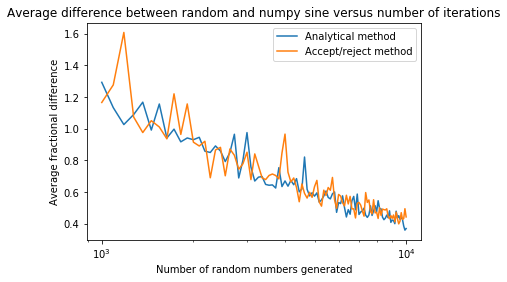

In [30]:
"""
This section of code measures the difference between the sine curve generated
by the two random number methods and numpy sine, with a varying number of
random numbers generated per sine curve, repeated 5 times and averaged. 
This is to see how the accuracy of each method changes with sample size. 
"""


numVals1 = np.linspace(1000,10000,100)                                           # Starting with a sine distribution consisting of 10 random numbers, going up to one with 10,000, with gaps of 10.
avAnal = []
avAR = []

for j in range(100):
    
    averageAnal = []
    averageAR = []
    diffAnal = 0
    diffAR = 0
    histAnal = np.histogram(sinDistAnal(numVals1[j]),200,density = True)        # Calculating histograms for each method to be compared against numpy sine.
    histAR = np.histogram(sinDistAR(numVals1[j]),200,density = True)
    
    for average in range(5):
    
        for i in range(200):
            
            sinHistAnal = np.sin(histAnal[1][i]) / 2
            sinHistAR = np.sin(histAR[1][i]) / 2
            diffAnal += abs(histAnal[0][i] - sinHistAnal)/sinHistAnal               # Keeping track of the difference for each curve so the average can be taken.
            diffAR += abs(histAR[0][i] - sinHistAR)/sinHistAR
        
        averageAnal.append(diffAnal/200)                                             # Calculating the average.
        averageAR.append(diffAR/200)
    
    meanAnal = st.mean(averageAnal)
    meanAR = st.mean(averageAR)    
    
    avAnal.append(meanAnal)
    avAR.append(meanAR)
 
plt.plot(numVals1,avAnal,label = "Analytical method")
plt.plot(numVals1,avAR,label = "Accept/reject method")
plt.xscale("log")
plt.xlabel("Number of random numbers generated")
plt.ylabel("Average fractional difference")
plt.title("Average difference between random and numpy sine versus number of iterations")
plt.legend()
plt.show()

This will take a short while.


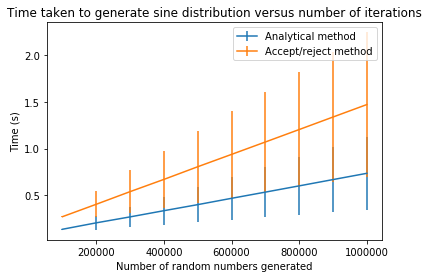

In [31]:
"""
This section of code measures the amount of time that each process takes to
produce a sine distribution, and compares that with a varying number of
iterations. This is also averaged over 5 iterations. This is to show how 
the computing time changes with the number of iterations.
"""


timeAnal = []
timeAR = []
numVals2 = np.linspace(100000,1000000,10)
errorAnal = []
errorAR = []
tAnal = []
tAR = []

print("This will take a short while.")

for j in range(10):
    for average in range(5):
        startAnal = time.process_time()
        sinDistAnal(numVals2[j])
        timeAnal.append(time.process_time() - startAnal)
        startAR = time.process_time()
        sinDistAR(numVals2[j])
        timeAR.append(time.process_time() - startAR)
    
    errorAnal.append(st.stdev(timeAnal))
    errorAR.append(st.stdev(timeAR))
    tAnal.append(st.mean(timeAnal))
    tAR.append(st.mean(timeAR))

plt.errorbar(numVals2,tAnal,yerr=errorAnal,label = "Analytical method")
plt.errorbar(numVals2,tAR,yerr=errorAR,label = "Accept/reject method")
plt.xlabel("Number of random numbers generated")
plt.ylabel("Time (s)")
plt.title("Time taken to generate sine distribution versus number of iterations")
plt.legend()
plt.show()

## Code Structure

#### Accuracy

To test the accuracy of the distributions, histograms were generated for each method, with a constant number of bins. This was so that one could compare the value of the randomly generated sine distribution with the built in numpy value for a given x value. The difference between these two values was taken over every x value (each bin), and the average was found. This was repeated 5 times and another average was found to reduce uncertainties, then the whole process was repeated with a varying number of random numbers making up the sine distribution. This was plotted for each method.

The reason for not including error bars in this part was because the x scale is logarithmic. Towards the right end of the scale, there are a very large number of points, that when error bars are included doesn't add any information, and in fact detracts from the general trend of the curve.

#### Computing Time

This invloved using a similar method as for testing the accuracy, only this time the time to generate the distributions was measured. Due to the large number of random numbers used, there were only 10 data points on this graph (as opposed to 100 in the previous part), since any more and it would take a very long time to generate. Because the time increases linearly with number of numbers, it is useful to use error bars.

## Discussion

#### Accuracy

As expected, as the number of iterations that make up the sine distribution gets large, both the analytical and accept/reject methods approach a sinusoidal distribution. It seems that both methods are equally accurate given the same number of iterations (with the exception of some anomalies, which are to be expected when dealing with random numbers).

In addition, the accuracy of both methods seems to increase exponentially (exponential decrease in average fractional difference) with the number of numbers making up the distributions. This is expected, since for a small number of numbers making up a distribution, adding just one number makes the graph look significantly more sine-like. While for a large distribution, adding one number barely changes the overall trend. 

#### Computing Time

With regards to the time taken for each method, the graph indicates that the analytical method is faster than accept/reject. This is because with each iteration of the analytic method, it is guaranteed that the random number generated will be valid (i.e. in the sine distribution). However this is not the case for the accept/reject method, where it is not guaranteed that a given iteration will return a valid number, and will have to be repeated.

However, the error bars for both methods overlap, indicating that there is some ambiguity with regards to the timings of each method, and that the relations may not be as clear cut as they initially seem.

In addition, the time taken to generate a sine distribution linearly increases with number of random numbers that make up that distribution. This is because in both methods, the time to generate the sine distribution increases linearly with the number of random numbers in that distribution.

## Q2 - Simulation
A very common use of Monte Carlo is in simulating experimental data. In simulations, an entire experiment can be reproduced data point by data point, with random numbers being used to model unknowable or changing effects such as the experimental resolution or quantum variations.

In this question, we will simulate the cosmic ray experiment shown below.
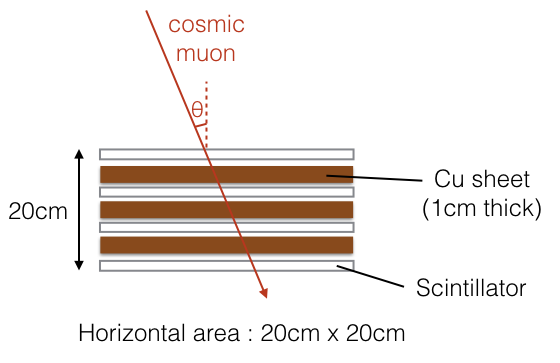
The experiment comprises 4 detection layers, each of which will produce a signal when a particle traverses the detector, separated by three sheets of copper, which will stop a fraction of muons, allowing a measurement of the muon lifetime to be made.

You can assume the detector has the following parameters :
* the efficiency of each of the 4 layers to detect a muon or electron is, from top to bottom : 55%, 60%, 85%, 50%.
* the probability of a cosmic ray muon to stop in 1cm of copper is $5\times10^{-3}$.
* electrons are emitted isotropically during decay of a stopped muon.
* decay electrons have energy 50 MeV and maximum path length of 1.8cm in copper.

In order to model the initial distribution of cosmic rays, we can assume the anuglar distribution is proportional to ${\rm cos}^2(\theta)$, for zenith angle $\theta$.  The overall normaliation can be taken from the intensity of _vertical_ muons to be 70 $m^{-2}s^{-1}sr^{-1}$. (See PDG review of cosmic rays : http://pdg.lbl.gov/2019/reviews/rpp2019-rev-cosmic-rays.pdf)


### 2a)
Using the model above, write code to simulate each muon that passes nearby the experiment. You will need to generate random numbers with appropriate distributions for the starting point and direction of each muon, and propagate each muon to the detector. You should generate further random numbers to model the stopping and decay process; ie. whether a muon stops in a given layer, and the direction of the decaying electron.

(Note that for the electron decay, you should generate points that are uniformly distributed on the unit sphere - simply generating two angles between 0 and $2\pi$ will _not_ give the correct distribution!)

You should discuss the design of your code in the text cell below.

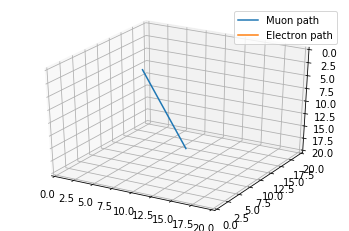

In [5]:
def cosMu():
    
    """
    This function generates the cos^2 distribution for the incident muons 
    using the accept/reject method, with a normalisation term 4/pi.
    """
    
    randNum = np.random.random()
    randPi = np.random.uniform(0,np.pi/2)
    
    if randNum <= (4/np.pi) * (np.cos(randPi)**2):                              # Random value for theta using accept/reject.
        return randPi
    else:
        return cosMu()
    
    
def phiMu():
    
    """
    This function generates a uniform distribution of random numbers from 0 to
    2 pi.
    """
    
    randPhi = np.pi*2*np.random.random()
    
    return randPhi
    

def initialXY():
    
    """
    This function generates a uniform distribution over the area of the
    detector.
    """
    
    randX = 20 * np.random.random()                                             # Random x and y coordinates from 0 to 20.
    randY = 20 * np.random.random()
    
    return randX,randY


def initialPosition():
    
    """
    This function calculates the direction of the incident muon. It calculates
    the position of the muon every 0.25cm into the detector, and checks that
    the muon hasn't left the detector.
    """
    
    theta = cosMu()
    phi = phiMu()
    Xi,Yi = initialXY()
    layerWidths = [4.25,1,4.25,1,4.25,1,4.25]                                   # Thickness of each layer.
    pos = 0
    X = [Xi]                                                                    # Initial X, Y, and Z values.
    Y = [Yi]
    Z = [pos]
    
    for i in range(7):
        pos += layerWidths[i]
        X.append(Xi + pos * np.tan(theta) * np.cos(phi))
        Y.append(Yi + pos * np.tan(theta) * np.sin(phi))
        Z.append(pos)
        
        if X[-1] > 20 or Y[-1] > 20 or X[-1] < 0 or Y[-1] < 0:
            X.pop()
            Y.pop()
            Z.pop()
            break
                
    return X,Y,Z,theta,phi


def detection_m():
    
    """
    This function determines if the muon is detected by each of the four
    scintillators. It also finds if the muon is stopped by a copper layer.
    """
    
    X,Y,Z,theta,phi = initialPosition()
    muon_detections = [0] * 4                                                   # Keeps track of which layer the muon is detected in.
    CuProb = 5e-3/np.cos(theta)                                                 # Probability of the muon stopping in copper.
    probs = [detector1,CuProb,detector2,CuProb,detector3,CuProb,detector4]
    Xe_pos,Ye_pos,Ze_pos = [],[],[]
    detections_e = 0
    
    for layer in range(7):
        
        if layer >= len(X) or layer >= len(Y):
            break
        
        if np.random.random() <= probs[layer]:
            
            if layer == 0:                                                      # Even indices correspond to scintillators.
                muon_detections[0] += 1
                
            if layer == 2:
                muon_detections[1] += 1
                
            if layer == 4:
                muon_detections[2] += 1
                
            if layer == 6:
                muon_detections[3] += 1
                
            if layer % 2 != 0:                                                  # Odd indices correspond to copper layers.
            
                X = X[:layer+1]
                Y = Y[:layer+1]
                Z = Z[:layer+1]
            
                if len(X) == 1 or len(X) == 3 or len(X) == 5:                   
                    break
                else:
                    Xe_pos,Ye_pos,Ze_pos,detections_e = detection_e(X[layer],Y[layer],Z[layer])
                    break
            
    return X,Y,Z,Xe_pos,Ye_pos,Ze_pos,detections_e,muon_detections


def electronAngle():
    
    """
    This function generates a uniform distribution over a sphere. The reason 
    for alpha having a sine distribution is that, if alpha was uniform from 
    0 to pi, there would be an abundance of numbers generated at the poles.
    Hence a sinusoidal distribution is required.
    """
    
    randNum = np.random.random()
    alpha = np.arccos(1 - 2*randNum)                                            # Alpha is the vertical angle (similar to theta for the muon, but goes from 0 to pi).
    beta = 2*np.pi * np.random.random()

    return alpha,beta 
   

def electronDir(Xe0,Ye0,Ze0):
    
    """
    This function calculates the direction of the emitted electron. Like the 
    muon, the position is calculated at every 0.25cm height in the detector.
    There is also a condition for if the electron leaves the detector.
    """
    
    alpha,beta = electronAngle()
    Xe = [Xe0]                                                                  # Initial X, Y, and Z values of the electron (the end point of the muon).
    Ye = [Ye0]
    Ze = [Ze0]
    

    for i in range(1,81):                                                       # There are 80 steps of 0.25cm each in the 20cm detector.
            
        if alpha > np.pi/2:                                                     # Electron points down (positive z).
            pos = Ze[0] + 0.25 * i
        else:
            pos = Ze[0] - 0.25 * i                                              # Electron points up (negative z).
        
        Xe.append(Xe[0] + abs(pos-Ze[0]) * np.tan(alpha) * np.cos(beta))
        Ye.append(Ye[0] + abs(pos-Ze[0]) * np.tan(alpha) * np.sin(beta))
        Ze.append(pos)
        
        if Xe[-1] > 20 or Ye[-1] > 20 or Xe[-1] < 0 or Ye[-1] < 0 or Ze[-1] < 0 or Ze[-1] > 20:
            Xe.pop()
            Ye.pop()
            Ze.pop()
            break
                  
    return Xe,Ye,Ze,alpha


def electron_absorption(dis,alpha):
    
    """
    This function updates the distance the electron has travelled to check if
    it has been absorbed by the copper (after the 1.8cm maximum path length.)
    """
    
    dis = dis + 1/np.cos(alpha)                                                 # Updates the distance travelled by the electron.
    absorption_e = False
    if dis >= 1.8:
        absorption_e = True
    if dis < 1.8:
        absorption_e = False
    
    return absorption_e,dis


def detection_e(Xe0,Ye0,Ze0):
    
    """
    This function determines if the emitted electron is detected and/or 
    absorbed in each layer of the detector.
    """
    
    Xe,Ye,Ze,alpha = electronDir(Xe0,Ye0,Ze0)
    
    detections_e = [0] * 4                                                      # Keeps track of which layer the electron is detected in.
    dis = 0
    test1,test2,test3,test4 = False,False,False,False                           # Keeps track of if the electron has entered the scintillator once. 
    
    for height in Ze:
        
        if height <= 4.25 and test1 is False:
            
            test1 = True
            if np.random.random() <= detector1:
                detections_e[0] += 1
                
        if 4.25 < height <= 5.25:
            
            absorption_e,dis = electron_absorption(dis,alpha)
            
            dis = dis + 1/np.cos(alpha)
            absorption_e = False
            if dis >= 1.8:
                absorption_e = True
            if dis < 1.8:
                absorption_e = False
            
            if absorption_e is True:
                Xe = Xe[:2]                                                     # Truncates the electron path if it is absorbed.
                Ye = Ye[:2]
                Ze = Ze[:2]
                break
            
        if 5.25 < height <= 9.25 and test2 is False:
            
            test2 = True
            if np.random.random() <= detector2:
                detections_e[1] += 1
                
        if 9.5 < height <= 10.5:
            
            absorption_e,dis = electron_absorption(dis,alpha)
            
            if absorption_e is True:
                Xe = Xe[:4]
                Ye = Ye[:4]
                Ze = Ze[:4]
                break
            
        if 10.5 < height <= 14.75 and test3 is False:
            
            test3 = True
            if np.random.random() <= detector3:
                detections_e[2] += 1
                
        if 14.75 < height <= 15.75:
            
            absorption_e,dis = electron_absorption(dis,alpha)
            
            if absorption_e is True:
                Xe = Xe[:6]
                Ye = Ye[:6]
                Ze = Ze[:6]
                break
            
        if 15.75 < height <= 20 and test4 is False:
            
            test4 = True
            if np.random.random() <= detector4:
                detections_e[3] += 1
                
    return Xe,Ye,Ze,detections_e


def plot():
    
    """
    This function plots the muon path and, if applicabale, electron path.
    """

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim(0,20)
    ax.set_ylim(0,20)
    ax.set_zlim(20,0) 
    X,Y,Z,Xe,Ye,Ze,electron_detections,muon_detections = detection_m()
    ax.plot(X,Y,Z,label = "Muon path")
    ax.plot(Xe,Ye,Ze,label = "Electron path")
    plt.legend()
    plt.show()


plot()

## Code Structure

There are a lot of different aspects to this simulation, hence the large number of functions and many lines of code.

Initially, it was necessary to generate the initial angles of the muons. The 'vertical' angle (denoted here by theta) was generated using the accept/reject method, since the analytical method could not be used for $\cos^2(x)$ (the function is un-invertable), while the 'horizontal' angle (phi) was simply uniform between 0 and $2\pi$.

Next was generating the initial coordinates of the muon. This was simple; just generate two coordinates, X and Y, uniform between 0 and 20. These were used to calculate the trajectory of the muon in the detector, using simple trigonometry.

After this came working out if the muon gets detected in the scintillators or absorbed in the copper layers. This was implemented simply using if statements for each layer, along with the probabilities given in the question, and more trigonometry.

Then the angles and trajectory of the electron were calculated. The main issue with this part was generating the uniformly spherical distribution - simply using two angles, one between 0 and $\pi$ and the other between 0 and $2\pi$, would not suffice. This is because generating uniform points on a plane does not transfer well to a sphere - all the points at the top of the plane would be next to each other at the 'north' pole of the sphere, and similarly for the 'south' pole. (This is the same issue as the problem with the Mercator projection of the Earth). Therefore the polar angle should be distributed according to $\sin(x)$.

The same method for the muons was carried out to find the electron trajectory, and similarly the conditions on the trajectory; whether the electron reaches its 1.8cm path length or leaves the region of the detector. The muon and electron paths were then plotted.

## Discussion

The code for this part is rather long. Had I more time, I would have used classes to store the properties of the electrons and muons, to make the code significantly shorter.

I could have also used an exponential decay to make the muon stop in the copper, rather than applying the probability once at the top of each layer. This could also go for the electrons, rather than stopping after 1.8cm, they should exponentially decay, with very few electrons actually reaching the 1.8cm limit.

In addition, it would have been good to not just update the muon position with each layer, but have a smaller increment. This is because, if the incident muon has an angle close to the horizontal, it may leave the detector before reaching the second layer, resulting in a single data point and no line on the graph.

### 2b)
In the next cell you should validate your code.  The aim is to test separate parts of the code individually, to ensure the expected distributions or behaviour are produced in each case.

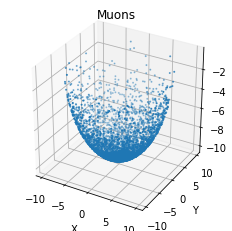

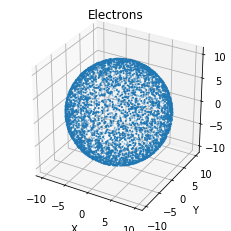

In [6]:
"""
This section of code checks that the distribution of muons and electrons 
matches what is required. It generates a scatter plot of x, y, and z
coordinates corresponding to randomly generated angles.
"""


fig = plt.figure()
fig_e = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax_e = fig_e.add_subplot(111, projection='3d')

x = []                                                                          # Muon position in cartesian coordinates.
y = []
z = []

xe = []                                                                         # Electron position in cartesian coordinates.
ye = []
ze = []

r = 10                                                                          # Distance from centre to point.


for i in range(5000):
    
    alpha,beta = electronAngle()
    theta = cosMu()
    phi = phiMu()
    
    x.append(r*np.sin(theta)*np.cos(phi))                                       # Converting polar coordinates to cartesian.
    y.append(r*np.sin(theta)*np.sin(phi))
    z.append(-r*np.cos(theta))
    
    xe.append(r*np.sin(alpha)*np.cos(beta))
    ye.append(r*np.sin(alpha)*np.sin(beta))
    ze.append(r*np.cos(alpha))

ax.scatter(x,y,z,s=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_aspect("equal")
ax.set_title("Muons")

ax_e.scatter(xe,ye,ze,s=1)
ax_e.set_xlabel('X')
ax_e.set_ylabel('Y')
ax_e.set_zlabel('Z')
ax_e.set_aspect("equal")
ax_e.set_title("Electrons")
plt.show()

## Code Structure

The implementation of this part was simple. All that was required was converting the $\theta$, $\phi$, $\alpha$, and $\beta$ angles to cartesian coordinates, plotting them as a scatter graph, and repeating this for a large number of points to show a good distribution.

## Discussion

The muon and electron distributions match what is needed; the muons a sort of stretched hemisphere (proportional to $\cos^2$), and the electrons a uniform sphere. 

### 2c)
Now, use your simulation to estimate :
* The total rate of muons that pass through the detector.
* The fraction of those muons which are registered in 1, 2, 3 or 4 scintillator planes of the detector. 
* The fraction of those muons which decay and produce an electron that can be detected in an adjacent scintillator layer.

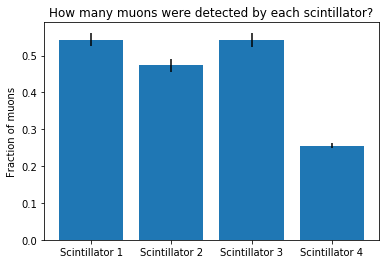

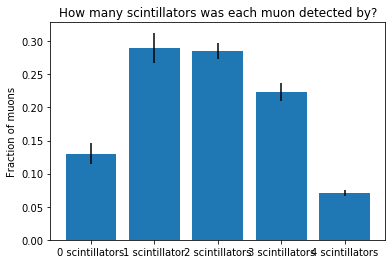

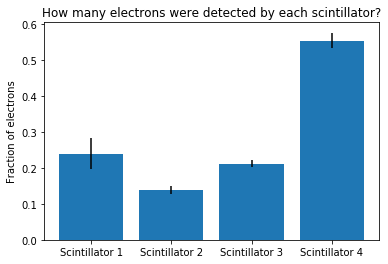

Total number of muons entering the detector: 1000


Fraction of muons detected by the first scintillator: 0.5434
Fraction of muons detected by the second scintillator: 0.474
Fraction of muons detected by the third scintillator: 0.5424
Fraction of muons detected by the fourth scintillator: 0.2554


Fraction of muons detected by zero scintillators: 0.13
Fraction of muons detected by one scintillator: 0.29
Fraction of muons detected by two scintillators: 0.2856
Fraction of muons detected by three scintillators: 0.2236
Fraction of muons detected by four scintillators: 0.0708


Fraction of muons that decayed to electrons: 0.4738


Fraction of electrons detected by the first scintillator: 0.23976361333896157
Fraction of electrons detected by the second scintillator: 0.13887716336006753
Fraction of electrons detected by the third scintillator: 0.21190375685943436
Fraction of electrons detected by the fourth scintillator: 0.5550865344027015


In [131]:
"""
This section of code plots bar charts for how many muons each scintillator
detected, which scintillators each muon was detected by, and how many
electrons were detected by each scintillator.
"""


av = []
av_count = []
av_e = []
error = []
error_count = []
error_e = []
absorptions = 0
muons = 1000                                                                    # Number of muons entering the detector.
MDetections = np.zeros((4,5))
detections = np.zeros((5,5))
e_detections = np.zeros((4,5))

def noScintillator(muon_detections):                                            # Sums the total number of detections to calculate how many scintillators each muon is detected by.
    
    count = muon_detections[0]+muon_detections[1]+muon_detections[2]+muon_detections[3]
    
    return count

for j in range(5):                                                              # Repeats 5 times and calculates an average and standard deviation so error bars can be plotted.
    
    for i in range(muons):
    
        X,Y,Z,Xe_pos,Ye_pos,Ze_pos,detections_e,muon_detections = detection_m()
        Xe,Ye,Ze,electron_detections = detection_e(X[-1],Y[-1],Z[-1])
        
        if noScintillator(muon_detections) == 0:                                # How many scintillators each muon is detected by.
            detections[0][j] += 1
        if noScintillator(muon_detections) == 1:
            detections[1][j] += 1
        if noScintillator(muon_detections) == 2:
            detections[2][j] += 1
        if noScintillator(muon_detections) == 3:
            detections[3][j] += 1
        if noScintillator(muon_detections) == 4:
            detections[4][j] += 1
        
        if electron_detections != [0,0,0,0]:                                    # Determines if a muon was absorbed.
            absorptions += 1
        e_detections[0][j] += electron_detections[0]
        e_detections[1][j] += electron_detections[1]
        e_detections[2][j] += electron_detections[2]
        e_detections[3][j] += electron_detections[3]
        
        MDetections[0][j] += muon_detections[0]
        MDetections[1][j] += muon_detections[1]
        MDetections[2][j] += muon_detections[2]
        MDetections[3][j] += muon_detections[3]
        
absorptions /= 5                                                                # Average number of absorptions.
    
for i in range(4):
    av.append(st.mean(MDetections[i])/muons)                                    # Avergage number of detections and standard deviation.
    error.append(st.stdev(MDetections[i])/muons)
    av_e.append(st.mean(e_detections[i])/absorptions)
    error_e.append(st.stdev(e_detections[i])/absorptions)
    
for i in range(5):
    av_count.append(st.mean(detections[i])/muons)
    error_count.append(st.stdev(detections[i])/muons)

plt.figure()
labels = ["Scintillator 1","Scintillator 2","Scintillator 3","Scintillator 4"]
plt.xticks(range(len(av)), labels)
plt.bar(range(len(av)),av,yerr=error)
plt.ylabel("Fraction of muons")
plt.title("How many muons were detected by each scintillator?")
plt.show()

plt.figure()
labels = ["0 scintillators","1 scintillator","2 scintillators","3 scintillators","4 scintillators"]
plt.xticks(range(len(av_count)), labels)
plt.bar(range(len(av_count)),av_count,yerr=error_count)
plt.ylabel("Fraction of muons")
plt.title("How many scintillators was each muon detected by?")
plt.show()

plt.figure()
labels = ["Scintillator 1","Scintillator 2","Scintillator 3","Scintillator 4"]
plt.xticks(range(len(av_e)), labels)
plt.bar(range(len(av_e)),av_e,yerr=error_e)
plt.ylabel("Fraction of electrons")
plt.title("How many electrons were detected by each scintillator?")
plt.show()

print("Total number of muons entering the detector:",muons)
print("\n")
print("Fraction of muons detected by the first scintillator:",av[0])
print("Fraction of muons detected by the second scintillator:",av[1])
print("Fraction of muons detected by the third scintillator:",av[2])
print("Fraction of muons detected by the fourth scintillator:",av[3])
print("\n")
print("Fraction of muons detected by zero scintillators:",av_count[0])
print("Fraction of muons detected by one scintillator:",av_count[1])
print("Fraction of muons detected by two scintillators:",av_count[2])
print("Fraction of muons detected by three scintillators:",av_count[3])
print("Fraction of muons detected by four scintillators:",av_count[4])
print("\n")
print("Fraction of muons that decayed to electrons:",absorptions/muons)
print("\n")
print("Fraction of electrons detected by the first scintillator:",av_e[0])
print("Fraction of electrons detected by the second scintillator:",av_e[1])
print("Fraction of electrons detected by the third scintillator:",av_e[2])
print("Fraction of electrons detected by the fourth scintillator:",av_e[3])

## Code Structure

This part was simply a data gathering exercise. Using the functions defined in part a), the number of muons detected by each scintillator, how many scintillators each muon was detected by, and the number of electrons detected by each scintillator were extracted. This process was repeated 5 times, and averages and standard deviations were found. This allowed the average values to be plotted on a bar chart, along with error bars on each bar.

## Discussion

The first bar chart accurately represents what is expected: the bars roughly correspond to the corresponding probabilities of each scintillator, while also reflecting the increasing probability that the muon gets absorbed or leaves the detector as it propogates down the detector.

As for the second chart, it vaguely represents a Gaussian - this makes sense, since it is unlikely that a muon will be detected by either none or all of the scintillators, while about half is expected (if all the scintillators have the same probability. They don't, hence the 'uneven-ness' of the Gaussian).

With regards to the third chart, it is surprising that the fourth scintillator detected the most electrons, given that it had the lowest probability, and it only had electrons entering it from the top, rather than the top and bottom, the case with the centre two scintillators. This is probably due to a fault in the code, since there is no statistical reason why this would be the case otherwise.

In addition, the proportion of muons that decay to electrons (just over a third) is higher than expected - given a probability of 0.005 per copper layer across 3 layers, one would expect around 1 in every 50 muons to decay - significantly smaller than the current 1 in 3. Again, this is probably due to an error in the code, that would be fixed if more time was available.

This question is well suited to extensions. For example, a negative muon stopping in the Copper may be "captured" by an atomic nucleus, which modifies its lifetime (to ~0.164 $\mu s$). Positive muons are not captured and hence their lifetime is unaffected. You can simulate this, to estimate the expected distribution of muon decay times.  (An even more detailed simulation could include muons that stop in scintillator...)

Feel free to discuss possible extensions with your demonstrator and/or the unit director !

## Q3 - Statistical Analysis

In this question, we will explore the use of Monte Carlo methods to understand experiment outcomes.

Standard experimental error analysis frequently uses the assumption that uncertainties are normally distributed. The interpretation of a result quoted as $\mu \pm \sigma$ is taken that the true value lies within the range [$(\mu - \sigma$),$(\mu + \sigma)$] with a certain probability (usually 68%). However, it is not hard to find cases where these assumptions break. A classic example occurs when measuring a parameter that is close to a physical boundary - the standard error treatment may result in a range of values that includes the non-physical region.

A more sophisticated approach is to treat the measurement process as an inverse problem, ie. the inference of model parameters from experimental measurements. (For example, estimation of G from observations of planetary motion). Given a model, we can use Monte Carlo techniques to generate ensembles of "pseudo-experiments", and build up distributions of experimental outcomes for a given set of model parameters. Then it is straightforward to find the range of model parameters that cover an actual experimental observation, within a specified probability.

### 3a)

A "counting experiment" is performed at a collider, to search for the existence of a hypothesised new particle.  The experiment consists of counting the number of events that meet certain criteria. Events can be produced either by the hypothetical signal process, or by known background processes. However, an individual event cannot be ascribed to be signal or background - the only measurable quantity is the _total_ number of events.

Both signal and background processes produce a number of events that is Poisson distributed. The mean number of background events has been estimated to be $4.8 \pm 0.5$.  The mean number of signal events is given by $L \sigma$, where the integrated luminosity $L=10 nb^{-1}$, and $\sigma$ is the (unknown) cross section of the signal process. The number of events observed in the counting experiment is 6.

You should write a Monte Carlo programme that will calculate the upper limit on the signal cross section that is compatible with the observation at 95% confidence level.

You will need to generate pseudo-experiments for a range of different signal cross sections. For each pseudo-experiment, generate random numbers to model the Gaussian uncertainty on the background prediction, and the Poisson variation in both the background and signal production. Ensure that the number of pseudo-experiments are sufficient to measure the experimental distribution for each cross section, and in particular the fraction of the distribution that is _greater_ than the measured value (the confidence level).

How would you incorporate additional uncertainties?  For example, if the uncertainty on the luminosity is 5%, or the efficiency to identify signal events is estimated to be $0.7 \pm 0.1$ ?

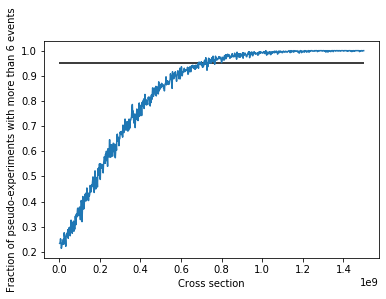

The upper limit on the value of sigma is 0.688 nb.


In [39]:
L = 10e-9                                                                       # Value of the luminosity.


def backgroundPoisson():
    
    """
    This function generates a Gaussian with mean 4.8 and standard deviation
    0.5. It then generates a Poisson distribution with random values from
    the Gaussian.
    """
    
    background_poisson = []
    background_mean = np.random.normal(4.8,0.5)                                 # Gaussian distribution.
    
    for i in range(50):
        
        background_poisson.append(np.random.poisson(background_mean))           # Background Poisson distribution.
    
    return background_poisson


def Sigma():
    
    """
    This function generates the values of the cross section that will be 
    used when finding the upper limit of the cross section.
    """
    
    sigma = []
    signal_mean = []
    
    for i in range(750):
        
        signal_mean.append(L*(0.02e8 + 0.02e8*i))
        sigma.append(signal_mean[i]/L)                                          # List of cross sections.
        
    return signal_mean,sigma


def signalPoisson(signal_mean):
    
    """
    This function generates a Poisson distribuition with values from the mean
    values of the signal (the cross section multiplied by the luminosity).
    """
    
    signal_poisson = np.random.poisson(signal_mean)                             # Signal Poisson distribution.
        
    return signal_poisson


def events():
    
    """
    This function generates a Poisson distribution representing the sum of 
    the background events and the signal events. It also determines how
    many values in the Poisson exceed the number of measured events, 6,
    and finds a list of cross sections that satisfy the confidence level
    (95% in this case). The first value in this list is the upper bound.
    """
    
    validSigma = []
    sixList = []
    num = 500                                                                   # Number of iterations per cross section.
    
    for i in range(750):
        
        signal_mean,sigma = Sigma()
        greaterThanSix = 0
        poisson = []
        
        for j in range(num):
            
            background_poisson = np.random.choice(backgroundPoisson())
            signal_poisson = signalPoisson(signal_mean[i])
            poisson.append(background_poisson + signal_poisson)                 # Total Poisson distribution.
            
            if poisson[j] > 6:
                
                greaterThanSix += 1
               
        if greaterThanSix/num >= 0.95:                                          # Confidence level.
            
            validSigma.append(sigma[i])
            
        sixList.append(greaterThanSix/num)
        
    return validSigma,sigma,sixList
            

validSigma,sigma,sixList = events()

plt.plot(sigma,sixList)
plt.hlines(0.95,0,1.5e9)
plt.xlabel("Cross section")
plt.ylabel("Fraction of pseudo-experiments with more than 6 events")
plt.show()

print("The upper limit on the value of sigma is",validSigma[0]/1e9,"nb.")

## Code Structure

Firstly a Poisson distribution was generated for the background flux. This was accomplished by first generating a Gaussian distribution with a mean of 4.8 and a standard deviation of 0.5. A random integer from this distribution was picked with each iteration, and added to the Poisson.

Next came the defining of the range of values of the cross section, as well as the mean values of the signal - $L\sigma$, where L is the luminosity and $\sigma$ the cross section. The signal Poisson was then generated from these mean values.

Iterating over the values of the cross section, values from the background Poisson distribution were added to values from the singal Poisson distribution to give the total Poisson. To find the upper limit on the cross section, the number of these values that were greater than the observed number (6) were counted. The value of the cross section at which the 95% of the total values in the Poisson were greater than 6 was the upper limit.

## Discussion

If more computing power was available, I would have repeated the experiment and calculated an average upper limit of sigma, with a standard deviation, along with error bars on the plot. However this would take to long to generate on my regular computer.

As the cross section gets large, it is expected that the fraction of pseudo-experiments with more than six events would approach one - the probability of that not happenning approaches zero. In fact, the Poisson distribution approaches a Gaussian as the cross section gets large. 

For a small cross section, one would expect the fraction of pseudo-experiments with more than six events to plateau at a constant value - this is because the background events would dominate.

#### Additional Uncertainties

Similarly to the error on the background average, were there a 5% error on the luminosity, I would write a function that creates a Gaussian with an average of 10 nb^-1 and a standard deviation of 0.5 nb^-1. Then I would generate a Poisson distribution from this Gaussian, and call the function in the same way as for the error on the background average.

As for an efficiency to identify signal events, again I would generate a Gaussian with average 0.7 and standard deviation 0.1. Then, when it comes to appending the sum of the background and signal poissons, I would simply insert an if statement with the condition being if a random number is less than a random number from the Gaussian, then the sum would be appended to the list.